# Segmentation and Recomendation System for the Manhattan Borough. 



## Table of content


1. Introduction
2. Getting the Data
    - Cleaning and Preprocessing
    - Visualizing data on folium map
    
3. Methodology
    - K Means Clustering
    - Content-Based Filtering

4. Results and Discussion
5. Conclusion


# Introduction

We have been hired by humtourist.co, a tourism company, to build a segmentaion and recommendation system for their clients to ensure they have the best experince during their stay in manhattan, New York city. Part of this job includes recommending the best places/neighbourhood for different activities ranging from relaxations, busy areas, restaurants, parks etc.

In [1]:
#Import necessary libraries for the project
import sys

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Libraries imported.




## 1. Getting Data

*All about this section*

The base data for this project was gotten from https://cocl.us/new_york_dataset. Were we collected boroughs in new york and respective latitude and longitude. 
The data was returned in a json format, we then preprocessed and cleaned the data to fit our problem thereby extracting only valuable data.The data collected were passed to a pandas dataframe.

We visualized these boroughs on a map with the help of folium and their respective coordinates. This gave a better feel of the data. Since this project is based only on segmenting and recommending venues in the manhattan borough, we extracted data partaining to manhattan borough only. 

To get the venues in the manhattan borough, we leveraged foursquare API in extracting this data . The data returned where venues_name, venue_category and venues latitude and longitude. This was further visualized on the folium map with the different venues as markers.

In [2]:
#Download and explore the dataset
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded')

Data downloaded


In [3]:
#Open the json dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
#Explore the first data in the dictionary
#This helps us in knowing which value names to use when iterating to get specific datas
neigbourhoods_data = newyork_data['features']
neigbourhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
#Create a dataframe to hold the data 
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude']
neigbourhoods = pd.DataFrame(columns=column_names)

In [6]:
#Pass in data to the new table
for data in neigbourhoods_data:
    borough = neigbourhoods_name = data['properties']['borough']
    neigbourhoods_name = data['properties']['name']
    
    neigbourhoods_latlon = data['geometry']['coordinates']
    neigbourhoods_lat = neigbourhoods_latlon[1]
    neigbourhoods_lon = neigbourhoods_latlon[0]
    neigbourhoods = neigbourhoods.append({
        'Borough': borough,
        'Neighbourhood': neigbourhoods_name,
        'Latitude': neigbourhoods_lat,
        'Longitude': neigbourhoods_lon,
    }, ignore_index=True)

In [7]:
neigbourhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neigbourhoods['Borough'].unique()),
        neigbourhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent='explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of New york city are {}, {}'.format(latitude, longitude))

The geographical coordinate of New york city are 40.7127281, -74.0060152


In [12]:
#Next lets create a map of new york with the defined neigborbhoods

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

#add neigborhoods marker
for lat, lon, borough, neigbourhood in zip(neigbourhoods['Latitude'], neigbourhoods['Longitude'], neigbourhoods['Borough'], neigbourhoods['Neighbourhood']):
    label = '{}, {}'.format(neigbourhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat,lon],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity='0.7',
    ).add_to(map_newyork)
map_newyork

## Extract only manhattan data

since we will be working only with the manhattan borough, lets extract data only partaining to the manhattan borough

### Extract manhattan data
manhattan = neigbourhoods[neigbourhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan.head()

In [31]:
#save the manhattan data
manhattan.to_csv('manhattan_data.csv')

In [32]:
#get the longitude and latitude of manhattan new york
address = 'Manhattan New york'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [43]:
#Next lets create the manhattan map using the longitude and longitude

map_Man = folium.Map(location = [latitude, longitude], zoom_start=11)

#add markers
for lat, lng, label in zip(manhattan['Latitude'], manhattan['Longitude'], manhattan['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        color='blue',
        radius = 4,
        popup=label,
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map_Man)
map_Man

## Extract venues in manhattan and their necessary details Using the Foursquare API 

In [2]:
#Define foursquare credentials and Version
CLIENT_ID = 'GGSRESGUNZWU4IWX5LPPAR12FCPPMCNJNMCNQWAFGVIOQFGN'
CLIENT_SECRET = 'Y2AP3Y1V1R5C3UUWF2QITSMS4QSLLHQ0UIFGLK3VPBWTTVUK'
VERSION = '20200202'
LIMIT = 100
radius=500
print('your credentials: ')
print(CLIENT_ID)
print(CLIENT_SECRET)

your credentials: 
GGSRESGUNZWU4IWX5LPPAR12FCPPMCNJNMCNQWAFGVIOQFGN
Y2AP3Y1V1R5C3UUWF2QITSMS4QSLLHQ0UIFGLK3VPBWTTVUK


In [17]:
#Create a function to extract Neighbourhood and venues within 500 radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'id',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
manhattan_venues = getNearbyVenues(names=manhattan['Neighborhood'],
                                   latitudes=manhattan['Latitude'],
                                   longitudes=manhattan['Longitude']
                                  )

In [3]:
#Save data
manhattan_venues = pd.read_csv('Man_venues.csv')

In [45]:
manhattan_venues.head(10)

,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,0,Marble Hill,40.876551,-73.91066,Arturo's,4b4429abf964a52037f225e3,40.874412,-73.910271,Pizza Place
1,1,Marble Hill,40.876551,-73.91066,Bikram Yoga,4baf59e8f964a520a6f93be3,40.876844,-73.906204,Yoga Studio
2,2,Marble Hill,40.876551,-73.91066,Tibbett Diner,4b79cc46f964a520c5122fe3,40.880404,-73.908937,Diner
3,3,Marble Hill,40.876551,-73.91066,Dunkin',4b5357adf964a520319827e3,40.877136,-73.906666,Donut Shop
4,4,Marble Hill,40.876551,-73.91066,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop
5,5,Marble Hill,40.876551,-73.91066,Astral Fitness & Wellness Center,4cf6ae55d3a8a1cd71a9d243,40.876705,-73.906372,Gym
6,6,Marble Hill,40.876551,-73.91066,Blink Fitness,55f751ca498eacc0307d1cfe,40.877271,-73.905595,Gym
7,7,Marble Hill,40.876551,-73.91066,T.J. Maxx,546d31ca498e561c698a0320,40.877232,-73.905042,Department Store
8,8,Marble Hill,40.876551,-73.91066,Land & Sea Restaurant,4b9c9c6af964a520b27236e3,40.877885,-73.905873,Seafood Restaurant
9,9,Marble Hill,40.876551,-73.91066,TCR The Club of Riverdale,4a725fa1f964a520f6da1fe3,40.878628,-73.914568,Tennis Stadium


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text xticklabel objects>)

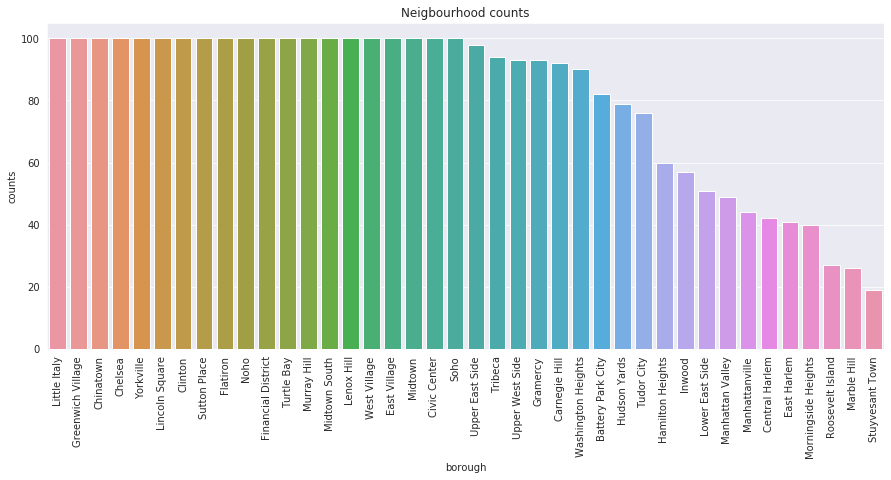

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
borough = manhattan_venues['Neighbourhood'].value_counts()
b = pd.DataFrame(borough)
b = b.reset_index()
b.columns = ['borough', 'counts']

plt.figure(figsize= (15, 6))
sns.barplot(x='borough', y='counts', data=b)
plt.title('Neigbourhood counts')
plt.xticks(rotation = 90)


## Building the segmentation system with K-Means

In [6]:
#one hot encoding
manhattan_seg_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

#add neigborhood colum back to dataframe
manhattan_seg_onehot['Neighbourhood'] = manhattan_venues['Neighbourhood']

fixed_columns = [manhattan_seg_onehot.columns[-1]] + list(manhattan_seg_onehot.columns[:-1])
manhattan_seg_onehot = manhattan_seg_onehot[fixed_columns]

manhattan_seg_onehot.shape

(3253, 327)

In [7]:
## Next lets group rows by neighborhood and by taking the mean of the frequency of occurency of each category

manhattan_seg_group = manhattan_seg_onehot.groupby('Neighbourhood').mean().reset_index()
manhattan_seg_group.head()

#Next print each neighborhood along with the top5 most common venues
num_top_venues = 5

for hood in manhattan_seg_group['Neighbourhood']:
    print("------"+hood+"-------")
    temp=manhattan_seg_group[manhattan_seg_group['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ["venue", "freq"]
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------Battery Park City-------
            venue  freq
0            Park  0.07
1     Coffee Shop  0.06
2           Hotel  0.06
3  Clothing Store  0.04
4   Memorial Site  0.04


------Carnegie Hill-------
                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2    French Restaurant  0.03
3            Wine Shop  0.03
4  Japanese Restaurant  0.03


------Central Harlem-------
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.05
2  American Restaurant  0.05
3   Seafood Restaurant  0.05
4    French Restaurant  0.05


------Chelsea-------
                 venue  freq
0          Coffee Shop  0.07
1   Italian Restaurant  0.04
2               Bakery  0.04
3  American Restaurant  0.04
4    French Restaurant  0.03


------Chinatown-------
                   venue  freq
0     Chinese Restaurant  0.08
1           Cocktail Bar  0.05
2    American Restaurant  0.04
3  Vietnamese Restaurant  0.03
4           Optical Shop  0.03


------Ci

In [8]:
#Create a function to extract mose common venues
def return_most_common_values(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0: num_top_venues]

columns = ['Neighbourhood']
num_top_venues = 10
indicators = ['std', 'nd', 'rd']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_seg = pd.DataFrame(columns=columns)
neighborhoods_venues_seg['Neighbourhood'] = manhattan_seg_group['Neighbourhood']

for ind in np.arange(manhattan_seg_group.shape[0]):
    neighborhoods_venues_seg.iloc[ind, 1:] = return_most_common_values(manhattan_seg_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_seg.head()

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Boat or Ferry,Clothing Store,Gym,Memorial Site,Pizza Place,BBQ Joint,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,French Restaurant,Wine Shop,Bookstore,Gym / Fitness Center,Bakery,Gym,Japanese Restaurant,Pizza Place
2,Central Harlem,African Restaurant,Seafood Restaurant,Bar,American Restaurant,French Restaurant,Chinese Restaurant,Spa,Bookstore,Boutique,Market
3,Chelsea,Coffee Shop,Bakery,American Restaurant,Italian Restaurant,Hotel,Ice Cream Shop,French Restaurant,Art Gallery,Cupcake Shop,Pet Store
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Hotpot Restaurant,Optical Shop,Salon / Barbershop,Bakery,Dessert Shop,Vietnamese Restaurant,Spa


### Use elbow method to determine best K

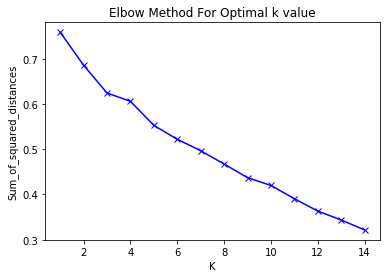

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
man_cluster = manhattan_seg_group.drop('Neighbourhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(man_cluster)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k value')
plt.show()

### Elbow method idicated 5 as the best K Means

In [11]:
km = KMeans(n_clusters=5, random_state=0).fit(man_cluster)
km.labels_[0:10]

array([1, 0, 1, 0, 1, 1, 1, 3, 0, 1], dtype=int32)

In [34]:
#Add clustering label to manhattan_seg_grouped
neighborhoods_venues_seg.insert(0, 'Cluster', km.labels_)

manhattan_merge = manhattan

manhattan_merge = manhattan_merge.join(neighborhoods_venues_seg.set_index('Neighbourhood'), on='Neighbourhood')
manhattan_merge.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Hotpot Restaurant,Optical Shop,Salon / Barbershop,Bakery,Dessert Shop,Vietnamese Restaurant,Spa
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Pizza Place,Bank,Mexican Restaurant,Spanish Restaurant,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,3,Café,Mexican Restaurant,Restaurant,Pizza Place,Lounge,Park,Chinese Restaurant,Deli / Bodega,Wine Bar,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sushi Restaurant,Caribbean Restaurant,School,Bakery


In [38]:
#Finally lets visualize these clusters on our map

manhattan_clusters = folium.Map(location=[40.78174080376753, -73.97312651246008]
                                , zoom_start=11)

#set color scheme for the clusters
x = np.arange(k)
ys=[i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merge['Latitude'], manhattan_merge['Longitude'], manhattan_merge['Neighbourhood'], manhattan_merge['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(manhattan_clusters)
       
manhattan_clusters

In [41]:
#CLuster 0: Lively areas (Restaurants, theaters, gym, cafe, store)
manhattan_merge.loc[manhattan_merge['Cluster'] == 0, manhattan_merge.columns[[1] + list(range(5, manhattan_merge.shape[1]))]]

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Chinese Restaurant,Pizza Place,Bank,Mexican Restaurant,Spanish Restaurant,Supplement Shop
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Pizza Place,Deli / Bodega,Diner,Sushi Restaurant,Mexican Restaurant,Japanese Restaurant
10,Lenox Hill,Italian Restaurant,Coffee Shop,Sushi Restaurant,Pizza Place,Cocktail Bar,Gym / Fitness Center,Café,Burger Joint,Gym,Salon / Barbershop
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Bakery,Café,Coffee Shop,Indian Restaurant,Thai Restaurant,Ice Cream Shop,Restaurant
13,Lincoln Square,Café,Theater,Italian Restaurant,Plaza,Performing Arts Venue,American Restaurant,Concert Hall,Gym / Fitness Center,Indie Movie Theater,Wine Shop
17,Chelsea,Coffee Shop,Bakery,American Restaurant,Italian Restaurant,Hotel,Ice Cream Shop,French Restaurant,Art Gallery,Cupcake Shop,Pet Store
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Café,Clothing Store,Indian Restaurant,American Restaurant,Gym,French Restaurant,Spa,Caribbean Restaurant
19,East Village,Bar,Pizza Place,Ice Cream Shop,Cocktail Bar,Mexican Restaurant,Wine Bar,Vegetarian / Vegan Restaurant,Speakeasy,Coffee Shop,Ramen Restaurant
21,Tribeca,American Restaurant,Italian Restaurant,Park,Spa,Café,Coffee Shop,Wine Bar,Men's Store,Bakery,Playground
22,Little Italy,Bakery,Café,Bubble Tea Shop,Italian Restaurant,Mediterranean Restaurant,Sandwich Place,Hotel,Cocktail Bar,Salon / Barbershop,Seafood Restaurant


In [42]:
#Cluestetr 1: Consist of Mostly resraurants and also other lively venues
manhattan_merge.loc[manhattan_merge['Cluster'] == 1, manhattan_merge.columns[[1] + list(range(5, manhattan_merge.shape[1]))]]

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Hotpot Restaurant,Optical Shop,Salon / Barbershop,Bakery,Dessert Shop,Vietnamese Restaurant,Spa
6,Central Harlem,African Restaurant,Seafood Restaurant,Bar,American Restaurant,French Restaurant,Chinese Restaurant,Spa,Bookstore,Boutique,Market
8,Upper East Side,Coffee Shop,Italian Restaurant,Exhibit,Bakery,Gym / Fitness Center,Juice Bar,Yoga Studio,Art Gallery,French Restaurant,Wine Shop
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,Spa,American Restaurant,Coffee Shop,Hotel,Wine Shop,Sandwich Place,Gym
15,Midtown,Hotel,Coffee Shop,Sporting Goods Shop,Clothing Store,Steakhouse,Bookstore,Gym,American Restaurant,Café,Theater
16,Murray Hill,Sandwich Place,Coffee Shop,American Restaurant,Hotel,Japanese Restaurant,Gym / Fitness Center,Bar,Mediterranean Restaurant,Cocktail Bar,Burger Joint
20,Lower East Side,Chinese Restaurant,Coffee Shop,Café,Bakery,Pizza Place,Cocktail Bar,Art Gallery,Japanese Restaurant,Ramen Restaurant,Farmers Market
28,Battery Park City,Park,Hotel,Coffee Shop,Boat or Ferry,Clothing Store,Gym,Memorial Site,Pizza Place,BBQ Joint,Sandwich Place
29,Financial District,Coffee Shop,Bar,American Restaurant,Cocktail Bar,Pizza Place,Gym,Gym / Fitness Center,Japanese Restaurant,Italian Restaurant,Food Truck
32,Civic Center,Coffee Shop,Hotel,Gym / Fitness Center,Cocktail Bar,Spa,French Restaurant,Yoga Studio,American Restaurant,Sandwich Place,Park


In [43]:
#CLuster 2: Recreational and Relaxation venues
manhattan_merge.loc[manhattan_merge['Cluster'] == 2, manhattan_merge.columns[[1] + list(range(5, manhattan_merge.shape[1]))]]

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Bar,Park,Heliport,Gym / Fitness Center,Gas Station,Harbor / Marina,Cocktail Bar,Pet Service,Farmers Market


In [44]:
#Cluster 3: Traveller Area(Relaxtion and Restaurants)
manhattan_merge.loc[manhattan_merge['Cluster'] == 3, manhattan_merge.columns[[1] + list(range(5, manhattan_merge.shape[1]))]]

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Café,Mexican Restaurant,Restaurant,Pizza Place,Lounge,Park,Chinese Restaurant,Deli / Bodega,Wine Bar,Frozen Yogurt Shop
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Mexican Restaurant,Yoga Studio,Sushi Restaurant,Caribbean Restaurant,School,Bakery
5,Manhattanville,Coffee Shop,Seafood Restaurant,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Park,Fried Chicken Joint,Climbing Gym,Falafel Restaurant,Farmers Market
7,East Harlem,Mexican Restaurant,Thai Restaurant,Bakery,Pizza Place,Latin American Restaurant,Deli / Bodega,Spanish Restaurant,Fast Food Restaurant,Gas Station,Taco Place
11,Roosevelt Island,Park,Bus Line,Residential Building (Apartment / Condo),Scenic Lookout,Sandwich Place,Liquor Store,Dry Cleaner,Supermarket,Dog Run,Monument / Landmark
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Burger Joint,Sandwich Place,Deli / Bodega,Pharmacy,Supermarket,Greek Restaurant
36,Tudor City,Park,Café,Mexican Restaurant,Deli / Bodega,Diner,Greek Restaurant,Coffee Shop,Asian Restaurant,Restaurant,Thai Restaurant


In [45]:
#Cluster 4: Areas with ranging varieties
manhattan_merge.loc[manhattan_merge['Cluster'] == 4, manhattan_merge.columns[[1] + list(range(5, manhattan_merge.shape[1]))]]

,Neighbourhood,1std Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,American Restaurant,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant


## Content Based Recommender system

first we'll extract additional data to our manhattan dataframe called the <strong>rating</strong> data. <strong>rating</strong> data is an important data for building a content based recommender system.

<strong>NOTE!</strong> we will pick only 5 Neighbourhood from the entire dataframe for our manhattan recommender system because rating data are part of the premium call for foursquare api and only returns 50 data per day

In [8]:
url_2='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format('55f81cd2498ee903149fcc64', CLIENT_ID, CLIENT_SECRET, VERSION)
results1 = requests.get(url_2).json()

In [4]:
manhattan_venues = pd.read_csv('Man_venues.csv')

In [6]:
## manhattan venues to 248
manhattan_cont = manhattan_venues[2629:2679]
print(manhattan_cont.shape)
manhattan_cont.tail()

(50, 9)


,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
2674,2674,Civic Center,40.715229,-74.005415,Laughing Man Coffee & Tea,4ea0afbf9adf1e334e4cc0e6,40.717394,-74.010103,Coffee Shop
2675,2675,Civic Center,40.715229,-74.005415,Juice Press,54148bc6498ea7bb8c05b70a,40.714788,-74.011132,Vegetarian / Vegan Restaurant
2676,2676,Civic Center,40.715229,-74.005415,The Roxy Hotel Bar,5227e38d11d20c833c575320,40.719394,-74.004924,Cocktail Bar
2677,2677,Civic Center,40.715229,-74.005415,The Roxy Hotel,3fd66200f964a520bbe61ee3,40.719341,-74.005044,Hotel
2678,2678,Civic Center,40.715229,-74.005415,Sweet Lily,4b141fe9f964a520a79d23e3,40.719143,-74.006537,Spa


In [7]:
#Iterate through the manhattan venues id and append venues rating to rating_list
rating_list=[]
result_list=[]
c=0
for i in manhattan_cont['id']:
    if c<10:
        url_rating='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
        results1 = requests.get(url_rating).json()
        
        result_list.append(results1)
        try:
            rating_list.append(results1['response']['venue']['rating'])
        except:
            rating_list.append("not rated")
    else:
        break

In [9]:
rating_8 = pd.DataFrame(rating_list,columns = ['ratings8'])

In [10]:
rating_8.to_csv('rating_to_2679.csv', index=False)

In [32]:
rating_1 = pd.read_csv('ratings_to_49.csv')
rating_1.shape

(49, 1)

In [15]:
rating_1 = pd.read_csv('ratings_to_49.csv')
rating_2 = pd.read_csv('ratings_to_98.csv')
rating_3 = pd.read_csv('rating_to_148.csv')
rating_4 = pd.read_csv('rating_to_198.csv')
rating_5 = pd.read_csv('rating_to_248.csv')
rating_6 = pd.read_csv('rating_to_298.csv')
rating_7 = pd.read_csv('rating_to_2629.csv')
rating_8 = pd.read_csv('rating_to_2679.csv')

rating_2 = rating_2[1:]

rating_1 = np.array(rating_1)
rating_2 = np.array(rating_2)
rating_3 = np.array(rating_3)
rating_4 = np.array(rating_4)
rating_5 = np.array(rating_5)
rating_6 = np.array(rating_6)
rating_7 = np.array(rating_7)
rating_8 = np.array(rating_8)


rating = np.concatenate((rating_1, rating_2, rating_3, rating_4, rating_5, rating_6, rating_7, rating_8))
print("New lenght of rating is ", len(rating))

New lenght of rating is  398


In [16]:
#Next turn rating into dataframe and save rating data
rating = pd.DataFrame(rating, columns=['rating'])
rating.to_csv('final_ratings.csv', index=False)

In [17]:
rating = pd.read_csv('final_ratings.csv')

In [18]:
address = 'Manhattan New york'
geolocator = Nominatim(user_agent = 'man_agent')
locator = geolocator.geocode(address)
lat = locator.latitude
lng = locator.longitude
print(f'The {address} coordinates are {lat,lng}')

The Manhattan New york coordinates are (40.7896239, -73.9598939)


In [19]:
manhattan_venues[2579:2679].head()

,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
2579,2579,Civic Center,40.715229,-74.005415,Atera,4f627061e4b05c1d57815977,40.716752,-74.005712,Molecular Gastronomy Restaurant
2580,2580,Civic Center,40.715229,-74.005415,Heyday,57ad129c498e05b086594d72,40.715726,-74.007767,Spa
2581,2581,Civic Center,40.715229,-74.005415,Gibney Dance Center Downtown,53373f26498e940581c90985,40.713923,-74.005661,Dance Studio
2582,2582,Civic Center,40.715229,-74.005415,Nish Nūsh,50ba9119e4b071a4bae6dc10,40.715537,-74.007725,Falafel Restaurant
2583,2583,Civic Center,40.715229,-74.005415,African Burial Ground National Monument,4a9442e3f964a520f92020e3,40.714990,-74.005530,Monument / Landmark


In [20]:
#add rating data to manhattan dataframe
#take not of the number of ratings
manhattan_data = pd.concat([manhattan_venues[0:298],manhattan_venues[2579:2679]],  axis=0).reset_index(drop=True)
manhattan_data['ratings'] = rating['rating']
manhattan_data.to_csv('manhattan_for_rec.csv', index=False)
manhattan_data.tail()


,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category,ratings
393,2674,Civic Center,40.715229,-74.005415,Laughing Man Coffee & Tea,4ea0afbf9adf1e334e4cc0e6,40.717394,-74.010103,Coffee Shop,8.8
394,2675,Civic Center,40.715229,-74.005415,Juice Press,54148bc6498ea7bb8c05b70a,40.714788,-74.011132,Vegetarian / Vegan Restaurant,9.1
395,2676,Civic Center,40.715229,-74.005415,The Roxy Hotel Bar,5227e38d11d20c833c575320,40.719394,-74.004924,Cocktail Bar,8.8
396,2677,Civic Center,40.715229,-74.005415,The Roxy Hotel,3fd66200f964a520bbe61ee3,40.719341,-74.005044,Hotel,8.7
397,2678,Civic Center,40.715229,-74.005415,Sweet Lily,4b141fe9f964a520a79d23e3,40.719143,-74.006537,Spa,8.5


In [22]:
#Plot the venue, venue category and ratings
ven_man = folium.Map(location=[lat, lng], zoom_start=11)

#Add marker
for lat, lng, ven, rating in zip(manhattan_data['Venue Latitude'],
                                          manhattan_data['Venue Longitude'], 
                                          manhattan_data['Venue'],  
                                          manhattan_data['ratings']):
    label = folium.Popup(str(ven) + ' ,' + str(rating), parse_html=True)
    folium.CircleMarker(
        [lat,lng],
         color='blue',
         radius = 4,
         popup=label,
         fill=True,
         fill_color='blue',
         fill_opacity=0.7,
         parse_html=False
    ).add_to(ven_man)
    
ven_man

In [23]:
#drop rows where venues where not rated
manhattan_data = manhattan_data[manhattan_data['ratings'] != 'not rated']
manhattan_data.reset_index(drop=True,inplace=True)
manhattan_data.drop(['Unnamed: 0'], axis=1, inplace  = True)
manhattan_data.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category,ratings
0,Marble Hill,40.876551,-73.91066,Arturo's,4b4429abf964a52037f225e3,40.874412,-73.910271,Pizza Place,8.0
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,4baf59e8f964a520a6f93be3,40.876844,-73.906204,Yoga Studio,8.8
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,4b79cc46f964a520c5122fe3,40.880404,-73.908937,Diner,8.8
3,Marble Hill,40.876551,-73.91066,Dunkin',4b5357adf964a520319827e3,40.877136,-73.906666,Donut Shop,7.7
4,Marble Hill,40.876551,-73.91066,Starbucks,55f81cd2498ee903149fcc64,40.877531,-73.905582,Coffee Shop,8.0


In [24]:
# one hot encoding
recommender_onehot = pd.get_dummies(manhattan_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
recommender_onehot['Neighbourhood'] = manhattan_data['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [recommender_onehot.columns[-1]] + list(recommender_onehot.columns[:-1])
recommender_onehot=recommender_onehot.groupby(['Neighbourhood'], sort=False).sum()
recommender_onehot.head()

,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Museum,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Marble Hill,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Chinatown,0,4,0,0,2,0,1,0,0,3,0,2,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,8,0,5,2,1,0,0,0,0,3,2,1,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,3,2,0,1,1,0,1,0,1,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,1,0,1,2,3,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,3,2,0,0,2,0,1,0,0,1,3,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,3,0,0,0,0,1
Washington Heights,1,1,0,0,0,0,0,0,0,4,2,1,0,0,0,0,0,1,0,0,1,0,5,0,0,0,1,3,1,1,2,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,1,0,1,0,0,0,0,2,0,3,0,0,0,0,0,2,0,0,0,1,2,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,2,0,1,0,1,1,0,0,0,0,2,1,0,0,0,2,2,1,0,0,2,0,0,0,0,0,0,1,0,1,2,0,1,0
Inwood,0,2,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,1,2,0,0,1,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,3,1,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1
Hamilton Heights,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [25]:
#reste index of encoded data
matrix = recommender_onehot.reset_index(drop=True)
matrix

,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Baby Store,Bagel Shop,Bakery,Bank,Bar,Bike Shop,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Empanada Restaurant,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Museum,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pet Café,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,4,0,0,2,0,1,0,0,3,0,2,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,8,0,5,2,1,0,0,0,0,3,2,1,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,3,2,0,1,1,0,1,0,1,0,1,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,1,1,0,1,2,3,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,3,2,0,0,2,0,1,0,0,1,3,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,3,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,4,2,1,0,0,0,0,0,1,0,0,1,0,5,0,0,0,1,3,1,1,2,0,0,0,2,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,1,0,1,0,0,0,0,2,0,3,0,0,0,0,0,2,0,0,0,1,2,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,2,0,1,0,1,1,0,0,0,0,2,1,0,0,0,2,2,1,0,0,2,0,0,0,0,0,0,1,0,1,2,0,1,0
3,0,2,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,1,2,0,0,1,0,0,0,2,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,3,1,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
5,0,3,1,1,1,1,0,1,1,2,0,1,0,0,1,0,1,0,1,1,1,1,2,1,1,0,0,0,1,4,6,0,1,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,4,0,1,0,1,0,1,0,0,2,5,1,0,0,5,2,0,0,1,0,2,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,4,0,2,0,0,1,0,0,2,1,0,0,0,0,0,1,1,0,0,0,1,2,1,0,3


In [26]:
#extract neighbourhood and rating
rec_rating=manhattan_data[['Neighbourhood','ratings']]
#change rating data type to float
rec_rating['ratings'] = rec_rating['ratings'].astype('float')
rec_rating.head()

<ipython-input-26-0f6b7d31e3d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_rating['ratings'] = rec_rating['ratings'].astype('float')


,Neighbourhood,ratings
0,Marble Hill,8.0
1,Marble Hill,8.8
2,Marble Hill,8.8
3,Marble Hill,7.7
4,Marble Hill,8.0


In [27]:
rec_rating_grouped=rec_rating.groupby('Neighbourhood', sort=False)['ratings'].mean()
rec_rating_grouped

Neighbourhood
Marble Hill           7.279167
Chinatown             8.516000
Washington Heights    7.174118
Inwood                7.586538
Hamilton Heights      8.228000
Civic Center          8.510000
Name: ratings, dtype: float64

In [28]:
final_rating=pd.DataFrame(rec_rating_grouped)
final_rating=final_rating.reset_index()
final_rating['ratings']

0    7.279167
1    8.516000
2    7.174118
3    7.586538
4    8.228000
5    8.510000
Name: ratings, dtype: float64

In [29]:
#perform dot product to get weights
user_rate = matrix.transpose().dot(final_rating['ratings'])
#The user profile rating
user_rate.sort_values(ascending=False)

Coffee Shop                        121.041107
Chinese Restaurant                 104.823430
Cocktail Bar                       100.250118
Bakery                              94.665548
American Restaurant                 89.220361
Café                                83.878204
Sandwich Place                      78.747735
Mexican Restaurant                  78.182389
Yoga Studio                         65.367705
Spa                                 59.588000
Park                                55.051312
Pizza Place                         53.956900
Hotel                               51.066000
Gym / Fitness Center                49.724118
Bar                                 48.530656
Gym                                 45.926569
Italian Restaurant                  40.938118
Wine Bar                            39.085195
Ice Cream Shop                      39.071823
Diner                               39.065823
Wine Shop                           38.954774
Lounge                            

In [30]:
rec_df= ((recommender_onehot*user_rate).sum(axis=1))/(user_rate.sum())
rec_df = rec_df.sort_values(ascending=False)
rec_df

Neighbourhood
Civic Center          1.377412
Chinatown             1.357580
Washington Heights    1.127192
Inwood                0.780856
Hamilton Heights      0.417530
Marble Hill           0.331666
dtype: float64

In [31]:
#put top two reccomended neighborhood too visit in a dataframe
top4=pd.DataFrame(rec_df)
top4=top4.reset_index()
top4.columns=['Neighbourhood','recommendation']
top4=top4.head(4)
top4

,Neighbourhood,recommendation
0,Civic Center,1.377412
1,Chinatown,1.357580
2,Washington Heights,1.127192
3,Inwood,0.780856








# Result And Discussion

Our system recommends the best neighborhood and venues to visit when clients of hamtourits are in manhattan also bringing to their notice , the best neighborhood for different activities with the help of our segmentation system. Our analysis shows that majority of the venues in manhattan are restaurants, and majority of venues in neighbohood with large number of venues are also restaurants. Also from our analysis, the coffee shop and  Chinese restaurant are the most recommended venue to visit, we also found out that chinatown was highly influential in the overall ratings of the Chinese restaurants and the civic center was also highly influential in the overall ratings of the coffee shop.

For clients visiting manhattan, These are the top recommendations according to venues, "Coffee Shop,Chinese Restaurant, Cocktail, Bar Bakery, American Restaurant, Mexican Restaurant and Sandwich Place.  They should be also visit civic center if they are looking to get the best coffee, chinatown for restaurants(not just including Chinese restaurant), Stuyvesant Town if they would love a relaxation and recreational center and marbell hill if they are looking out for a wide variety of activities.

# Conclusion

The aim of this project was to identify the best places/venues to visit in manhattan in order to give tourist the best experience while in manhattan without them wasting their time searching and asking for best spots in the city. We achieved this firstly by collecting necessary data and leveraging the foursqsuare API in searching for venues around manhattan raning from restaurants to bar, spa, parks, malls etc.

Next we asked ourselves how we can recommend the best venues. We ended up providing both a segmentation and recommendation system . Segmentation system to segment neighborhood with similar properties and recommendation system to recommend vnues based on ratings. This produced wonderful results and insights to provide tourist with the best experience